# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデルと数値計算の概観

## 2.7.2 近似

# scipy.interpolate.interp1d の使い方
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

* 線形補間でしか使っていないが、Cubic Splineとかも使える
* ちょっとコードの書き方が面倒

## 適当な二次関数を考える
$$
    y = a (x -b)^2 + c
$$

In [1]:
def test(x, a, b, c):
    return a*(x-b)**2 + c

In [13]:
# 必要なパッケージをインポートする
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.arange(-10,10+0.01, 0.01)

In [7]:
len(x)

2001

In [8]:
type(x)

numpy.ndarray

In [9]:
# パラメータを設定：適当
a = 0.75
b = 2
c = -10

In [11]:
y = np.zeros(len(x))

In [12]:
for i in range(len(x)):
    y[i] = test(x[i],a,b,c)

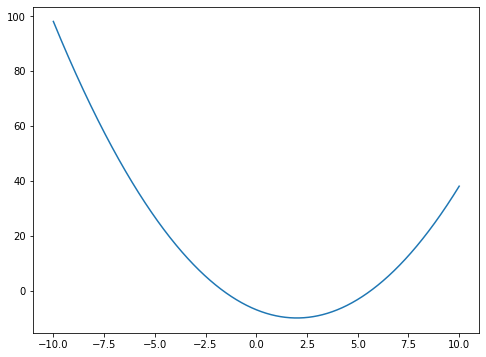

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y)
plt.show()

## 5個の点しかデータが得られなかったとしたら...

In [16]:
x1 = np.array([-10.0, -5.0, 0.0, 5.0, 10.0])

In [17]:
y1 = np.zeros(len(x1))
for i in range(len(x1)):
    y1[i] = test(x1[i],a,b,c)

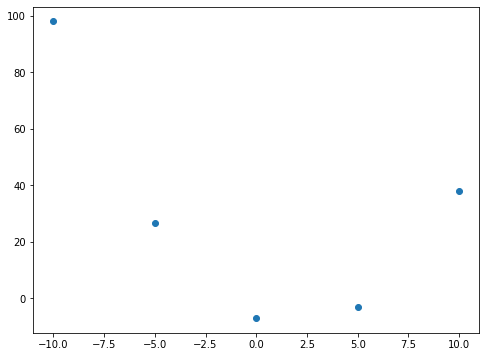

In [21]:
# 我々が知っているのは⬇の5個の点のみ
# ここから隙間を埋めることを考える

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1,y1)
plt.show()

---

## 線形補間

In [27]:
# 線形補間をする
interp_linear = interpolate.interp1d(x1,y1)

In [28]:
# 型を確認してみる
type(interp_linear)

scipy.interpolate._interpolate.interp1d

In [29]:
# 使い方
interp_linear(-5)

array(26.75)

In [30]:
test(-5, a, b, c) # データにある値なので上の値と一致する

26.75

In [31]:
# データ上に無い点を線形近似
interp_linear(-5.5)

array(33.875)

In [32]:
# ズレが生じる
test(-5.5, a, b, c)

32.1875

In [33]:
# オプションを指定しないと外層(Extrapolation)は出来ない：エラーが出る
interp_linear(-15)

ValueError: A value in x_new is below the interpolation range.

In [37]:
# Extrapolationをしたい場合、オプションを指定するように書く
interp_linear_extrap = interpolate.interp1d(x1,y1,fill_value="extrapolate")
interp_linear_extrap(-15) # outside grid: linear extrapolation

array(169.25)

In [38]:
# 実際の値とは大きなズレが生じている
test(-15, a, b, c)

206.75

In [40]:
x2 = np.arange(-15,15+0.01,0.01)
y2 = np.zeros(len(x2))

for i in range(len(x2)):
    y2[i] = interp_linear_extrap(x2[i])

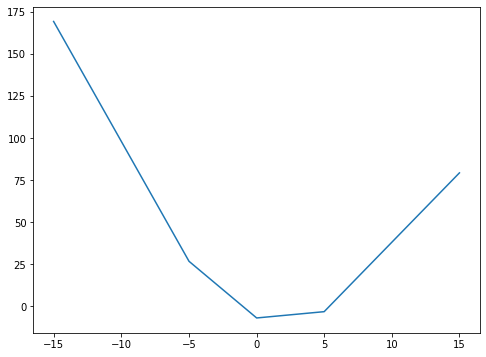

In [42]:
# Extrapolationは直線で延長しているのが確認出来る
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x2,y2)
plt.show()

---

In [54]:
x12 = np.arange(-10,10+5,5)

In [57]:
# 3次のスプライン補間をする
interpcubic = interpolate.interp1d(x12,y1,kind="cubic")

In [59]:
x3 = np.arange(-10,10+0.01,0.01)
y3 = np.zeros(len(x3))
for i in range(len(x3)):
    y3[i] = interpcubic(x3[i])

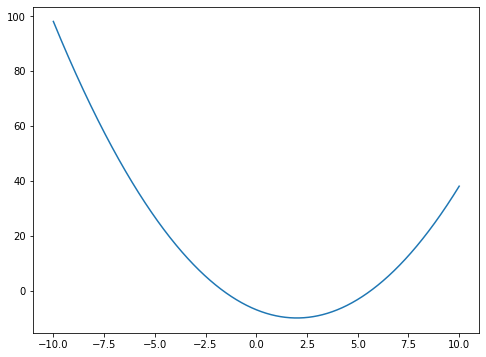

In [62]:
# Cubic Splineで近似した場合
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x3,y3)
plt.show()